In [6]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from sympy import symbols, solve

N = 10000
d = -5
r = 4
w = 2
mu = 0.0001

xn = []
dn = np.zeros(N)
wn = np.zeros((2,N+1))
yn = np.zeros(N)
en = np.zeros(N)
yf = np.zeros(N)

for i in range(N):
    lowHigh = random.randint(0, 1)
    leftRight = random.randint(0, 1)
    if lowHigh == 0:
        amp = math.pi*random.random()
        if leftRight == 0:
            xx = (random.random())*math.cos(amp)*(w/2)+(-r-(w/2))*math.cos(amp)
        else: 
            xx = random.random()*math.cos(amp)*(w/2)+(r+(w/2))*math.cos(amp)
        yy = random.random()*math.sin(amp)*w+r*math.sin(amp)
        dn[i] = 1
    else:
        amp = math.pi*random.random()+math.pi
        if leftRight == 0:
            xx = r + (w/2) + random.random()*math.cos(amp)*(w/2)+(-r-(w/2))*math.cos(amp)
        else: 
            xx = r + (w/2) + random.random()*math.cos(amp)*(w/2)+(r+(w/2))*math.cos(amp)
        yy = -(random.random()*math.sin(amp)*(-w)-r*math.sin(amp))-d
        dn[i] = -1
    
    #composição do vetor x(n)  
    position = np.zeros(2)
    position[0] = xx
    position[1] = yy
    auxPosition = position.copy()
    xn.append(auxPosition)
    
    #LMS
    yn[i] = np.dot(position,np.transpose(wn[:,i]))
    en[i] = (dn[i] - yn[i])
    wn[:,i+1] = wn[:,i] +  mu * en[i] * position

#cálculo da saída com coeficientes finais
for i in range(N):
    yf[i] = (np.dot((np.transpose(wn[:,N])), xn[i]))

#cálculo da taxa de erro
yfsignal = np.sign(yf)
errors = (int(np.sum(np.abs(dn-yfsignal))/2))
errorRate = (errors/N)*100

#coordenada dos erros
positionErrors = []
for i in range(N):
    if (dn-yfsignal)[i] != 0:
        positionErrors.append(xn[i])
        
#reta
a = wn[:,N][0]
b = wn[:,N][1]
xs = symbols('x')
ys = symbols('y')
f = a*xs+b*ys
straight = solve(f)
xs = straight[0][xs]
print (xs)
print(dn[0:10])
print(np.sign(yn)[0:10])

1.26017272047123*y
[-1.  1.  1.  1.  1.  1.  1. -1. -1.  1.]
[ 0. -1.  1.  1.  1.  1.  1.  1.  1.  1.]


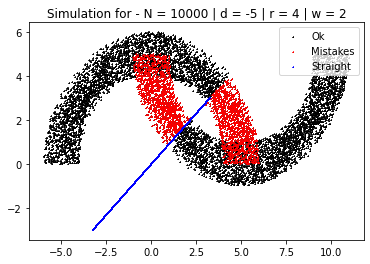

Error rate = 24%


In [151]:
straightVector = np.array([1.086 ,1])
straightPoints = []
for i in range(3000):
    straightPoints.append((i*0.001*straightVector))
    straightPoints.append(-(i*0.001*straightVector))

#plot de acertos (preto) e erros (vermelho)
xNp = np.array(xn)
x, y = xNp.T

positionErrorsNp = np.array(positionErrors)
xerror, yerror = positionErrorsNp.T

straightPointsNp = np.array(straightPoints)
xstraight, ystraight = straightPointsNp.T

okPoint = plt.scatter(x, y, s = 1, c = 'black', marker = '+')
mistakePoint = plt.scatter(xerror, yerror, s = 1, c = 'red', marker = '+')
straightPoint = plt.scatter(xstraight, ystraight, s = 1, c = 'blue', marker = '+')
plt.legend((okPoint, mistakePoint, straightPoint),
           ('Ok', 'Mistakes', 'Straight'),
           scatterpoints = 1,
           loc = 'upper right',
           ncol = 1,
           fontsize = 10)
plt.title('Simulation for - N = %i' %N + ' | d = %i' %d + ' | r = %i' %r + ' | w = %i' %w)
plt.show()

print('Error rate = %i' %errorRate + '%')